In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/surek/Downloads/face recognition/Datasets/Train'
valid_path = 'C:/Users/surek/Downloads/face recognition/Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('C:/Users/surek/Downloads/face recognition/Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Found 181 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Epoch 1/5
6/6 [==============================] - 79s 15s/step - loss: 1.7962 - accuracy: 0.5691 - val_loss: 0.9659 - val_accuracy: 0.5379
Epoch 2/5
6/6 [==============================] - 72s 13s/step - loss: 0.4063 - accuracy: 0.8122 - val_loss: 1.8057 - val_accuracy: 0.4773
Epoch 3/5
6/6 [==============================] - 71s 13s/step - loss: 0.2168 - accuracy: 0.9227 - val_loss: 0.8545 - val_accuracy: 0.6288
Epoch 4/5
6/6 [==============================] - 151s 28s/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 144s 27s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000


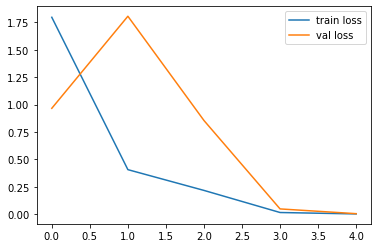

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/surek/Downloads/face recognition/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/surek/Downloads/face recognition/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [5]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model_1.h5')